# **Prepare**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# **Dataset Overview**

Dataset includes 8128 observations on 13 variables:
*   `name`: name of the car
*   `year`: year of manufacture
*   `selling_price`: resale price
*   `km_driven`: number of kilometers traveled
*   `fuel`: type of fuel used: `Diesel`, `Petrol`, `LPG` or `CNG`
*   `sell_type`: seller type: `Individual`, `Dealer` or `Trustmark Dealer`
*   `transmission`: transmission type of the car: `Manual` or `Automatic`
*   `owner`: The number of owners who have owned the car: `First Owner`, `Second Owner`, `Third Owner`, `Fourth & Above Owner` or `Test Drive Car`
*   `mileage`: Number of kilometers traveled per 1 liter or 1 kg of fuel
*   `engine`: engine of the car
*   `max_power`: Maximum capacity of the car
*   `torque`: torque of the car
*   `seats`: number of seats in the car

In [ ]:
cars_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/Cardetails.csv')

In [ ]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
cars_data.drop(columns=['torque'], inplace=True)

In [ ]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [ ]:
cars_data.shape

(8128, 12)

# **Data Integration**

Because the dataset is ingested from only one source, so that we'll skip this step.

# **Data Cleaning**

## Missing Data

In [ ]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [ ]:
cars_data.dropna(inplace=True)

In [ ]:
cars_data.shape

(7907, 12)

## Data Duplication

In [ ]:
cars_data.duplicated().sum()

1189

In [ ]:
cars_data.drop_duplicates(inplace=True)

In [ ]:
cars_data.shape

(6718, 12)

In [ ]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [ ]:
cars_data.describe()

,year,selling_price,km_driven,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,5.434653
std,3.900648,5.235398e+05,5.869980e+04,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# **Data Analysis**

The cleaned dataset has total of 6718 observations, included:
*   Categorical variables: `name`, `fuel`, `seller_type`, `transmission`, `owner`, `seats`
*   Numerical variables: `selling_price`, `km_driven`, `mileage`, `engine`, `max_power`


In [ ]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [ ]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [ ]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [ ]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [ ]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [ ]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [ ]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [ ]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [ ]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [ ]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [ ]:
cars_data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.00000,6718.000000,6718.000000,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,19.46531,1430.891337,87.753036,5.434653
std,3.900648,5.235398e+05,5.869980e+04,4.04915,493.493277,31.740261,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.80000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,19.44000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.50000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,400.000000,14.000000


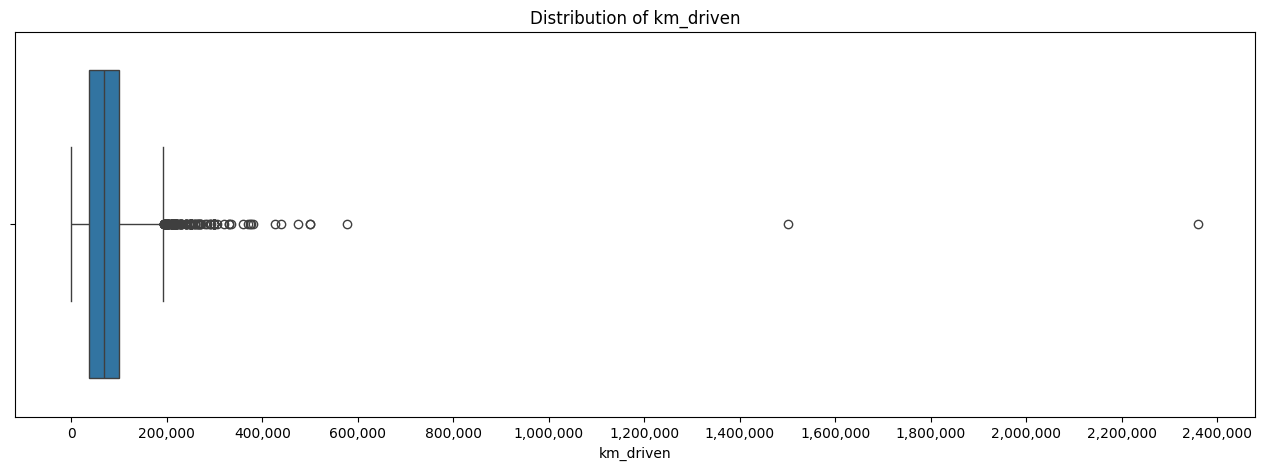

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 5))
sns.boxplot(x=cars_data['km_driven'])

# Đặt định dạng trục x
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(200000))  # Đặt khoảng cách giữa các mốc giá trị
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Distribution of km_driven')
plt.xlabel('km_driven')
plt.show()


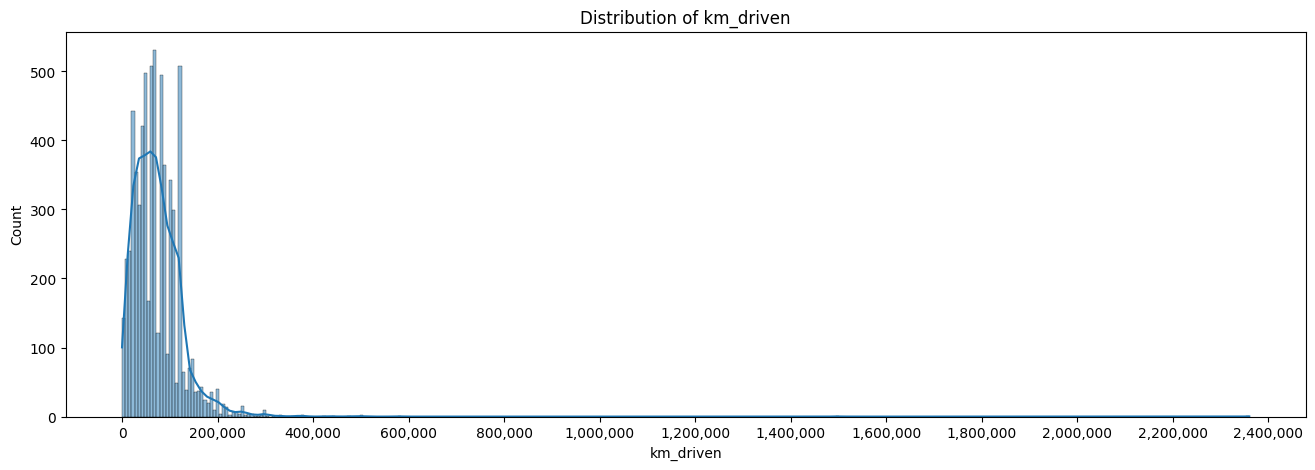

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 5))

# Create boxplot
sns.histplot(x=cars_data['km_driven'],kde=True)

# Đặt định dạng trục x
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(200000))  # Đặt khoảng cách giữa các mốc giá trị
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Distribution of km_driven')
plt.xlabel('km_driven')
plt.show()


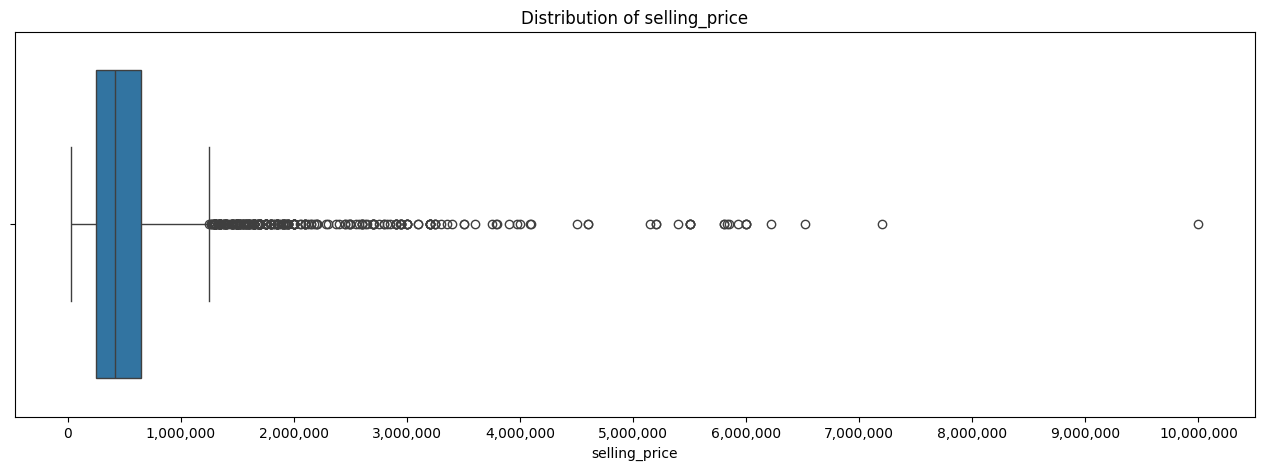

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 5))
sns.boxplot(x=cars_data['selling_price'])

# Đặt định dạng trục x
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1000000))  # Đặt khoảng cách giữa các mốc giá trị
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Distribution of selling_price')
plt.xlabel('selling_price')
plt.show()

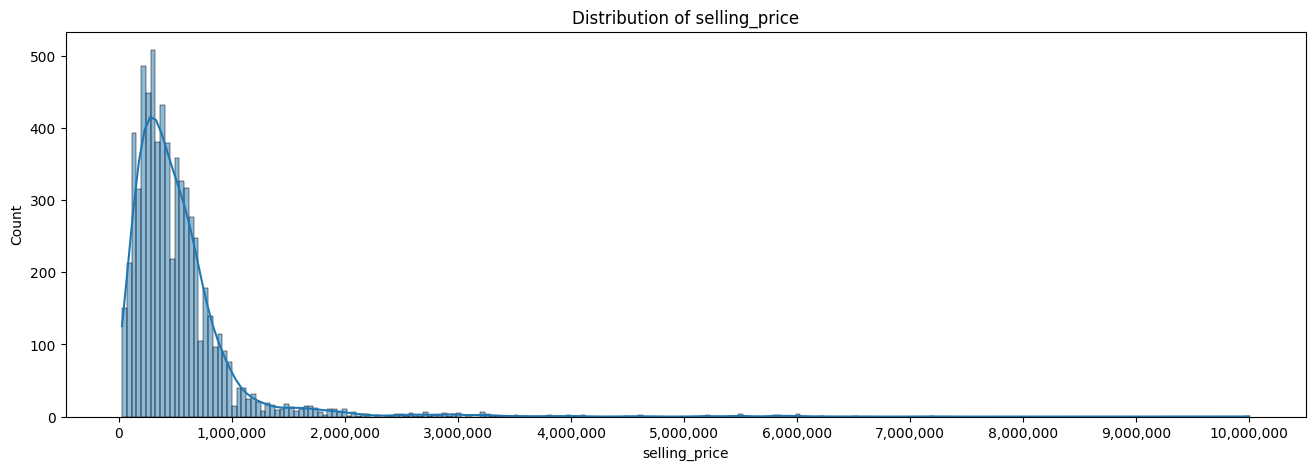

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 5))

sns.histplot(x=cars_data['selling_price'],kde=True)

# Đặt định dạng trục x
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1000000))  # Đặt khoảng cách giữa các mốc giá trị
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Distribution of selling_price')
plt.xlabel('selling_price')
plt.show()


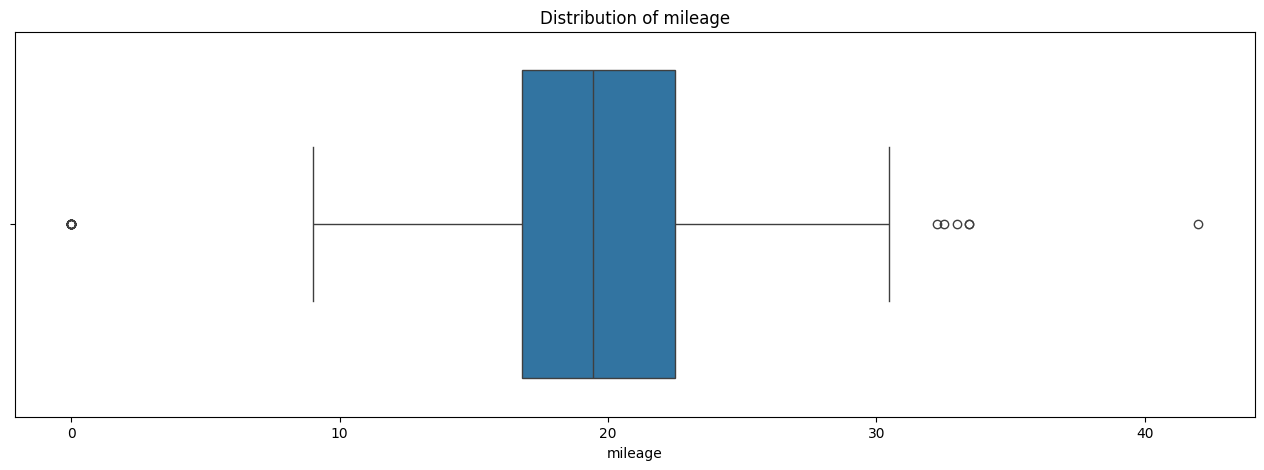

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 5))
sns.boxplot(x=cars_data['mileage'])
plt.title('Distribution of mileage')
plt.xlabel('mileage')
plt.show()

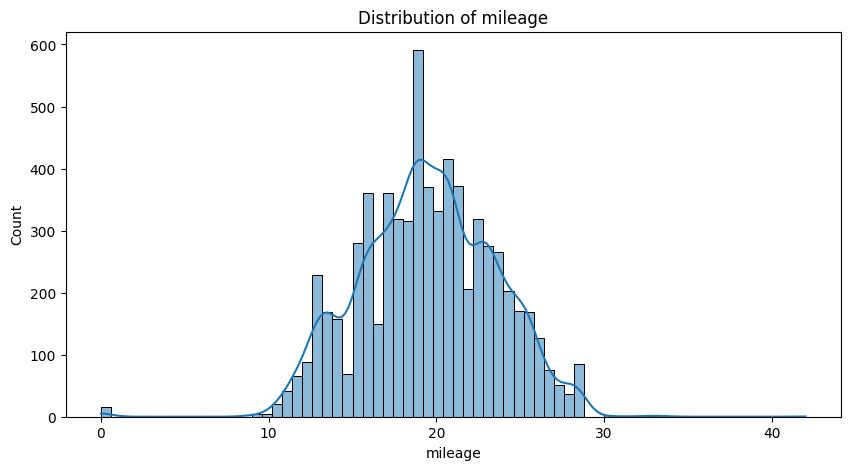

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(cars_data['mileage'], kde =True , stat='count', palette='mako')
plt.title('Distribution of mileage')
plt.xlabel('mileage')
plt.show()


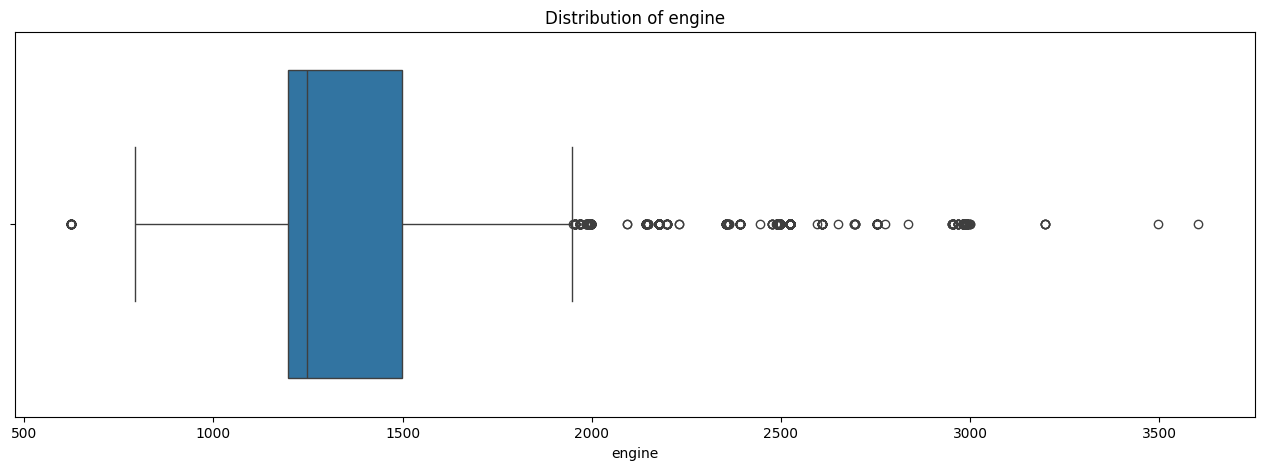

In [ ]:
plt.figure(figsize=(16, 5))
sns.boxplot(x=cars_data['engine'])

plt.title('Distribution of engine')
plt.xlabel('engine')
plt.show()

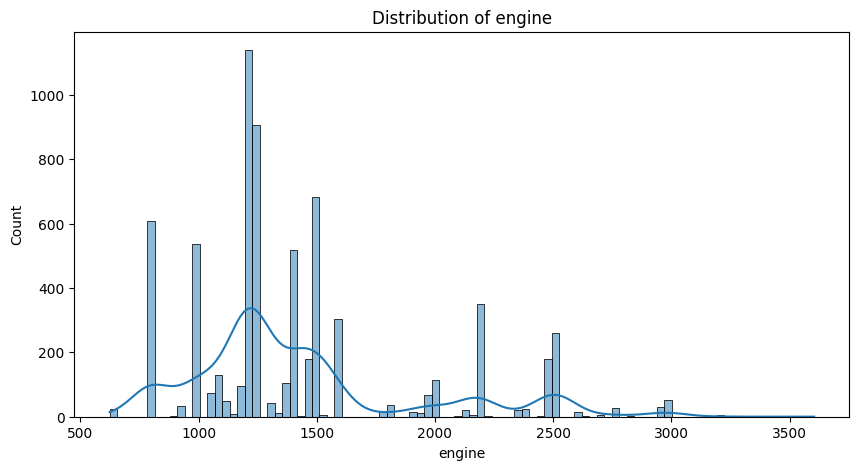

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))
sns.histplot(cars_data['engine'], kde =True , stat='count', palette='mako')
plt.title('Distribution of engine')
plt.xlabel('engine')
plt.show()


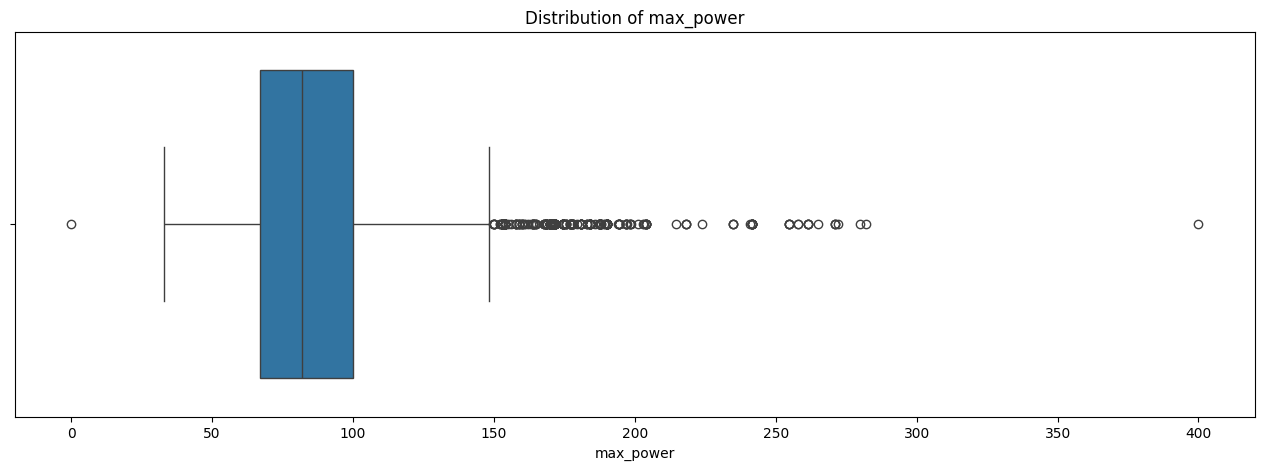

In [ ]:
plt.figure(figsize=(16, 5))
sns.boxplot(x=cars_data['max_power'])
plt.title('Distribution of max_power')
plt.xlabel('max_power')
plt.show()

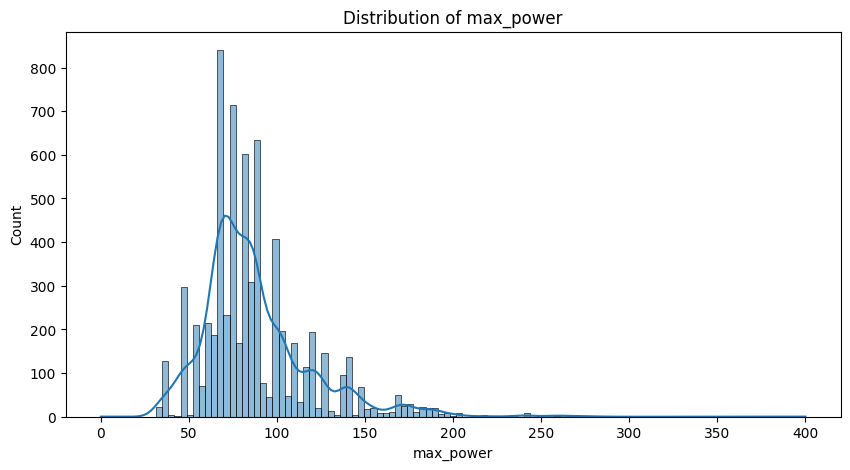

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(cars_data['max_power'], kde =True , stat='count', palette='mako')
plt.title('Distribution of max_power')
plt.xlabel('max_power')
plt.show()


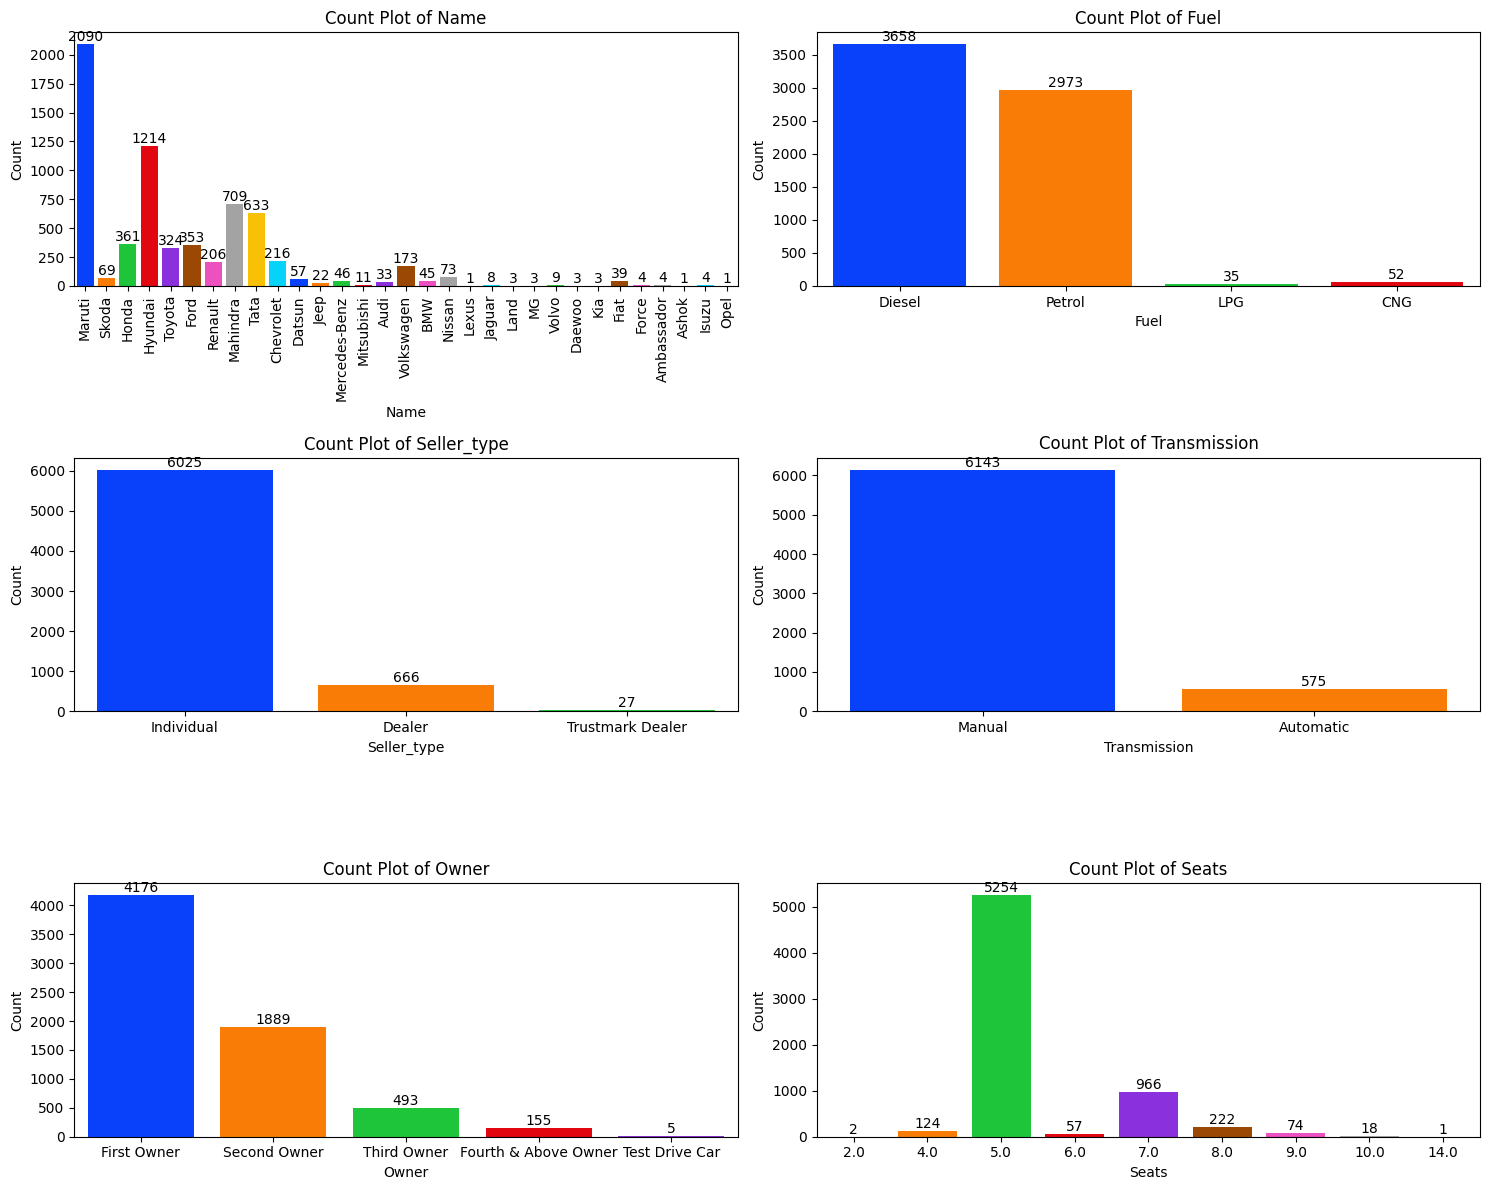

In [ ]:
categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner',
                       'seats']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.ravel()


for i, column in enumerate(categorical_columns):
    sns.countplot(x=cars_data[column], data=cars_data, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

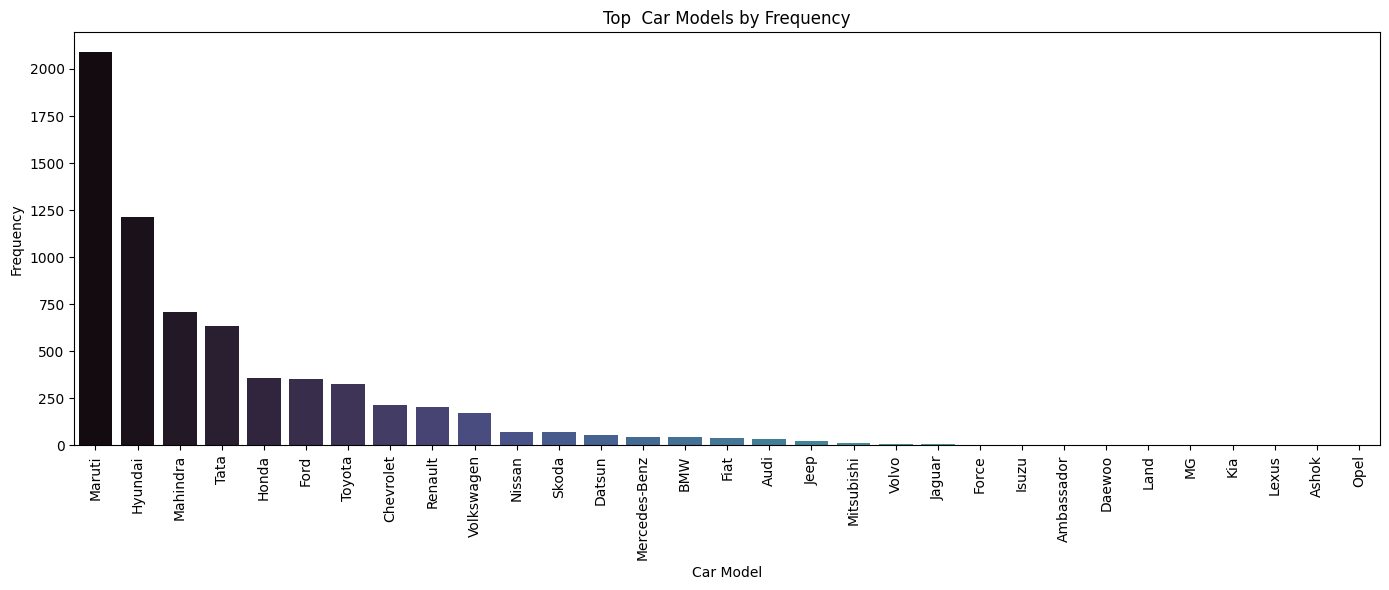

In [ ]:
top_car_models = cars_data['name'].value_counts().head(31)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_car_models.index, y=top_car_models.values,order=top_car_models.index,palette='mako')
plt.title(f'Top  Car Models by Frequency')
plt.xlabel('Car Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

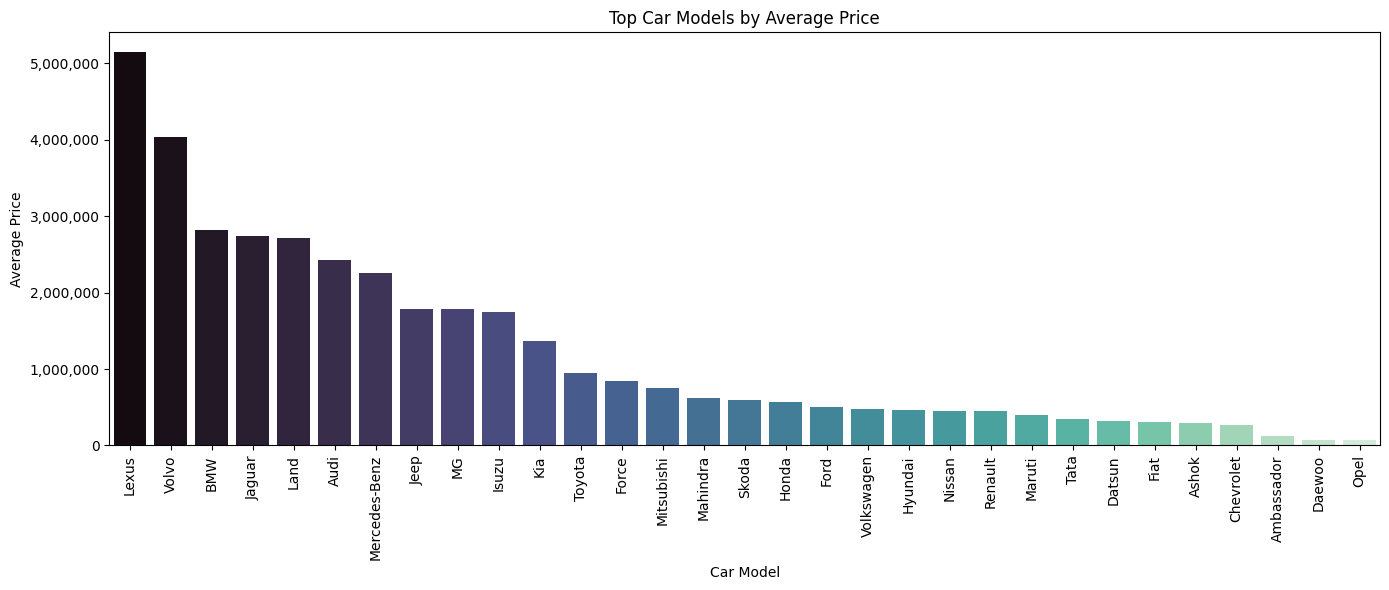

In [ ]:
avg_prices_by_car = cars_data.groupby('name')['selling_price'].mean().sort_values(ascending=False)
top_car_models = avg_prices_by_car.head(31)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_car_models.index, y=top_car_models.values,order=top_car_models.index, palette='mako')

plt.title('Top Car Models by Average Price')
plt.xlabel('Car Model')
plt.ylabel('Average Price')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1000000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


About `name`, from the fig above, the number of Lexus in the  is the lowest, but average price are the highest.

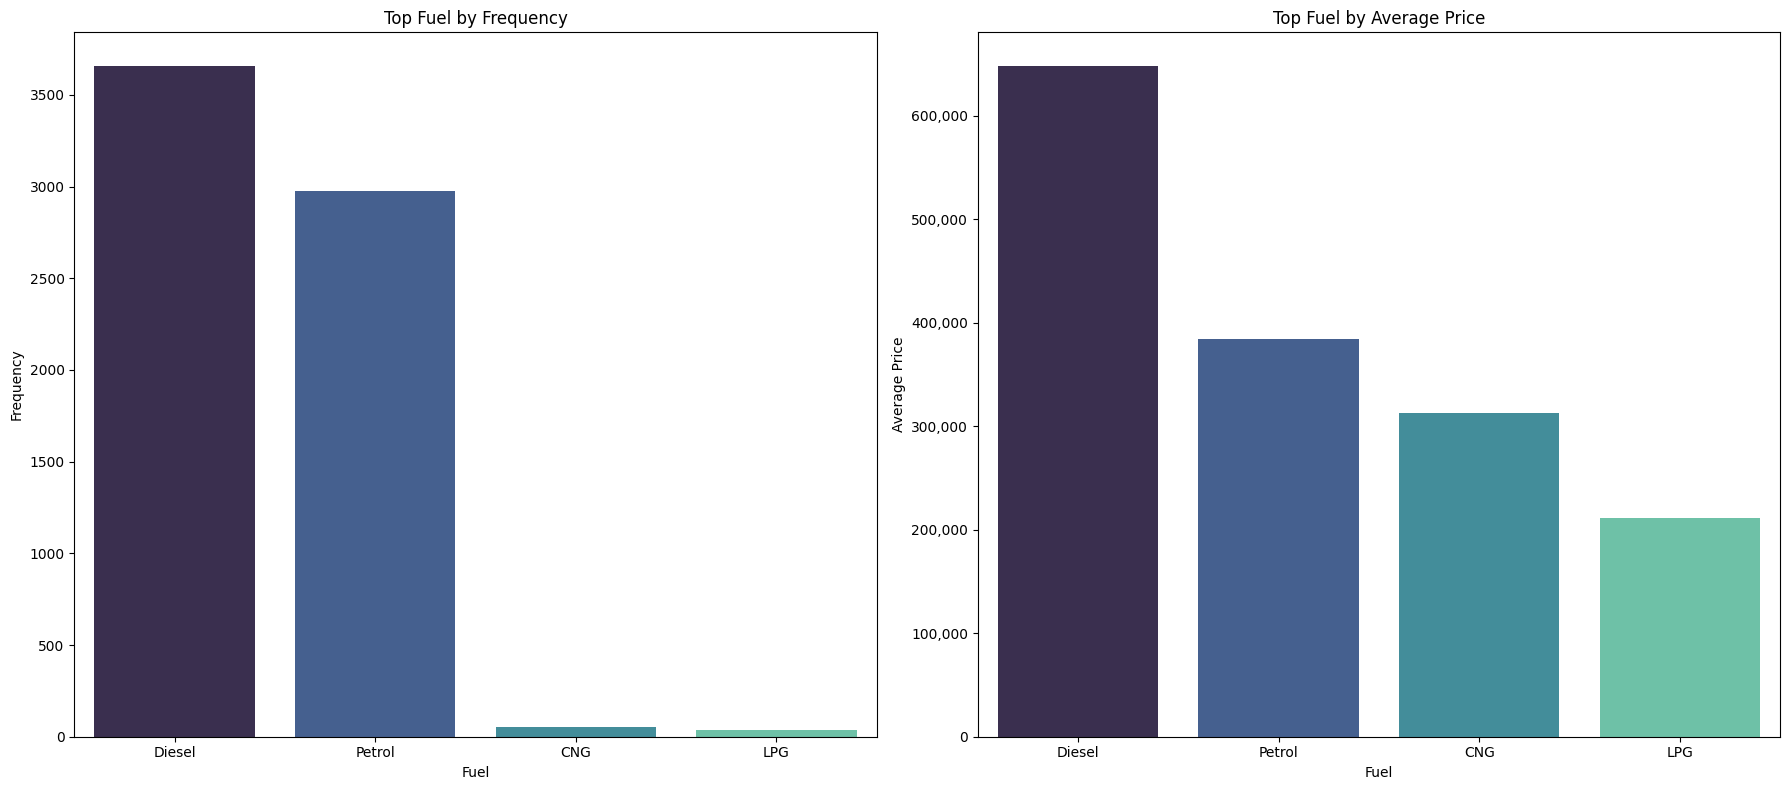

In [ ]:
top_fuel = cars_data['fuel'].value_counts().head(4)
avg_prices_by_fuel = cars_data.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)
top_fuel_price = avg_prices_by_fuel.head(4)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(ax=axes[0], x=top_fuel.index, y=top_fuel.values, order=top_fuel.index, palette='mako')
axes[0].set_title('Top Fuel by Frequency')
axes[0].set_xlabel('Fuel')
axes[0].set_ylabel('Frequency')

sns.barplot(ax=axes[1], x=top_fuel_price.index, y=top_fuel_price.values, order=top_fuel_price.index, palette='mako')
axes[1].set_title('Top Fuel by Average Price')
axes[1].set_xlabel('Fuel')
axes[1].set_ylabel('Average Price')
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(100000))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()


About `fuel`, from the fig above, the number and average price of Diesel in the is the highest.

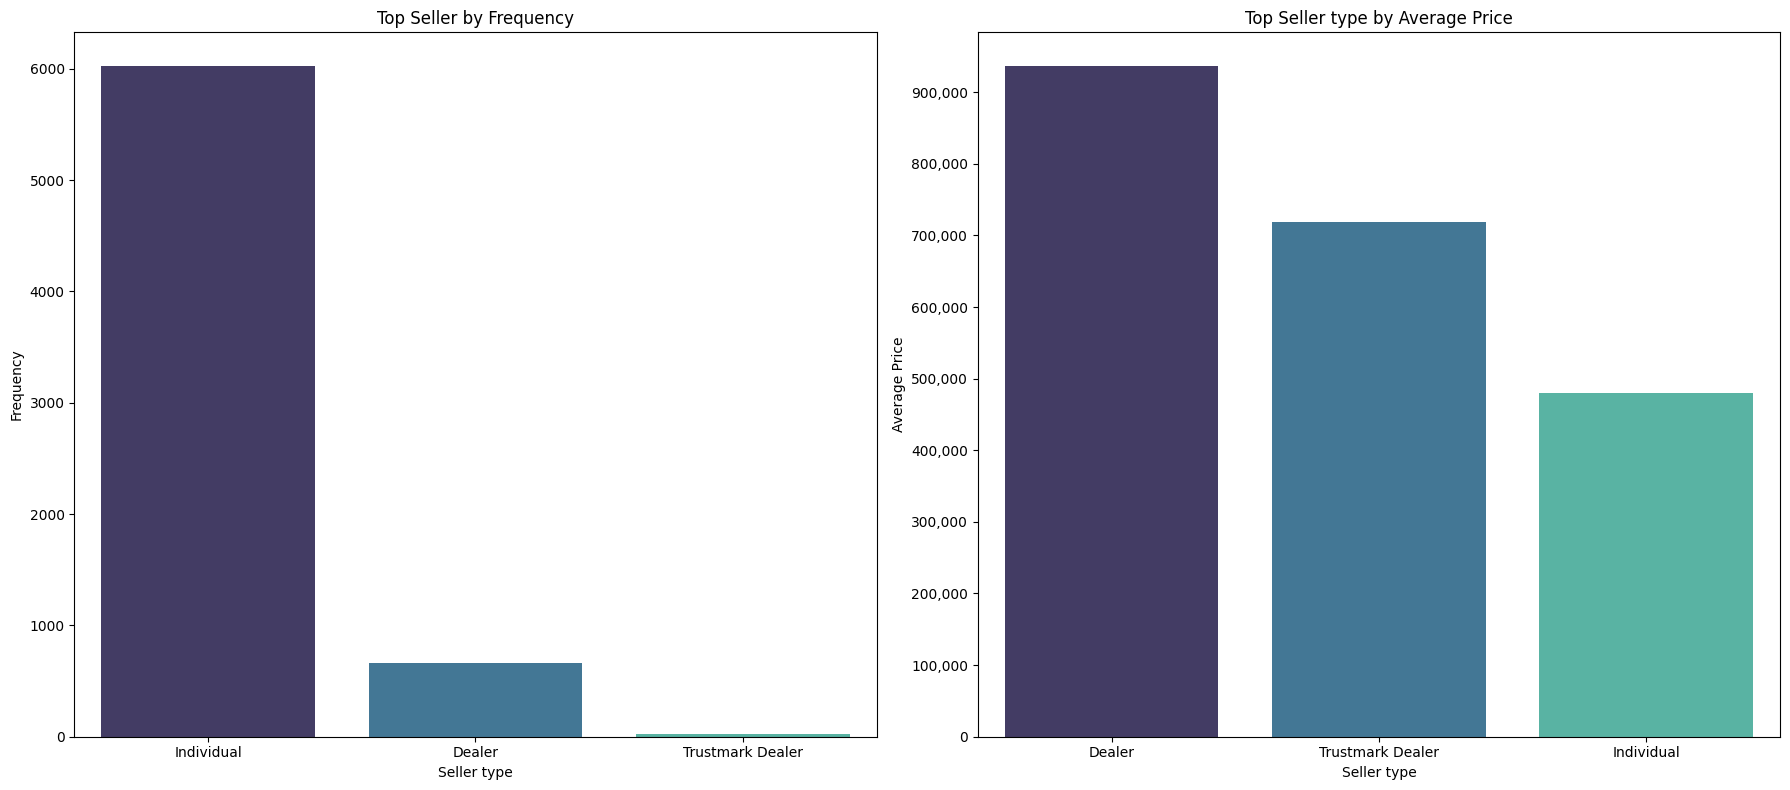

In [ ]:
top_seller = cars_data['seller_type'].value_counts().head(3)

avg_prices_by_seller_type = cars_data.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
top_seller_prices = avg_prices_by_seller_type.head(3)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(ax=axes[0], x=top_seller.index, y=top_seller.values, order=top_seller.index, palette='mako')
axes[0].set_title('Top Seller by Frequency')
axes[0].set_xlabel('Seller type')
axes[0].set_ylabel('Frequency')

sns.barplot(ax=axes[1], x=top_seller_prices.index, y=top_seller_prices.values, order=top_seller_prices.index, palette='mako')
axes[1].set_title('Top Seller type by Average Price')
axes[1].set_xlabel('Seller type')
axes[1].set_ylabel('Average Price')
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(100000))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


About `seller_type`, from the fig above, the number of Trustmark Dealder in the is the lowest, but the average price is also quite high.

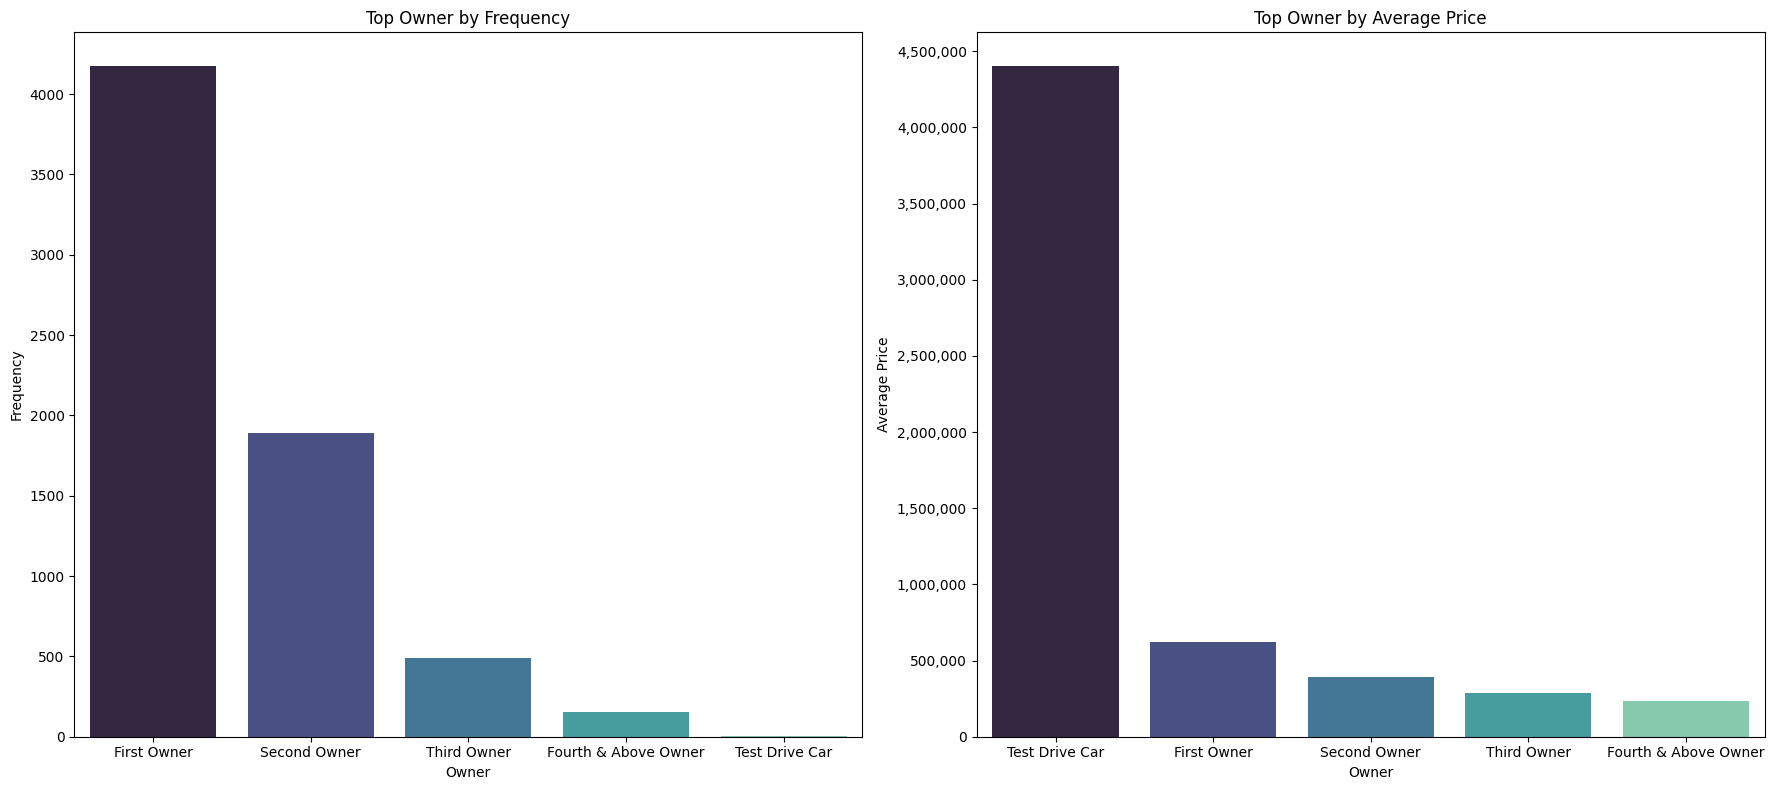

In [ ]:
top_owner = cars_data['owner'].value_counts().head(5)

avg_prices_by_owner = cars_data.groupby('owner')['selling_price'].mean().sort_values(ascending=False)
top_owner_prices = avg_prices_by_owner.head(5)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(ax=axes[0], x=top_owner.index, y=top_owner.values, order=top_owner.index, palette='mako')
axes[0].set_title('Top Owner by Frequency')
axes[0].set_xlabel('Owner')
axes[0].set_ylabel('Frequency')

sns.barplot(ax=axes[1], x=top_owner_prices.index, y=top_owner_prices.values, order=top_owner_prices.index, palette='mako')
axes[1].set_title('Top Owner by Average Price')
axes[1].set_xlabel('Owner')
axes[1].set_ylabel('Average Price')
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(500000))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


About `owner`, from the fig above, the number of Test Drive car in the is the lowest, but average price are the highest.

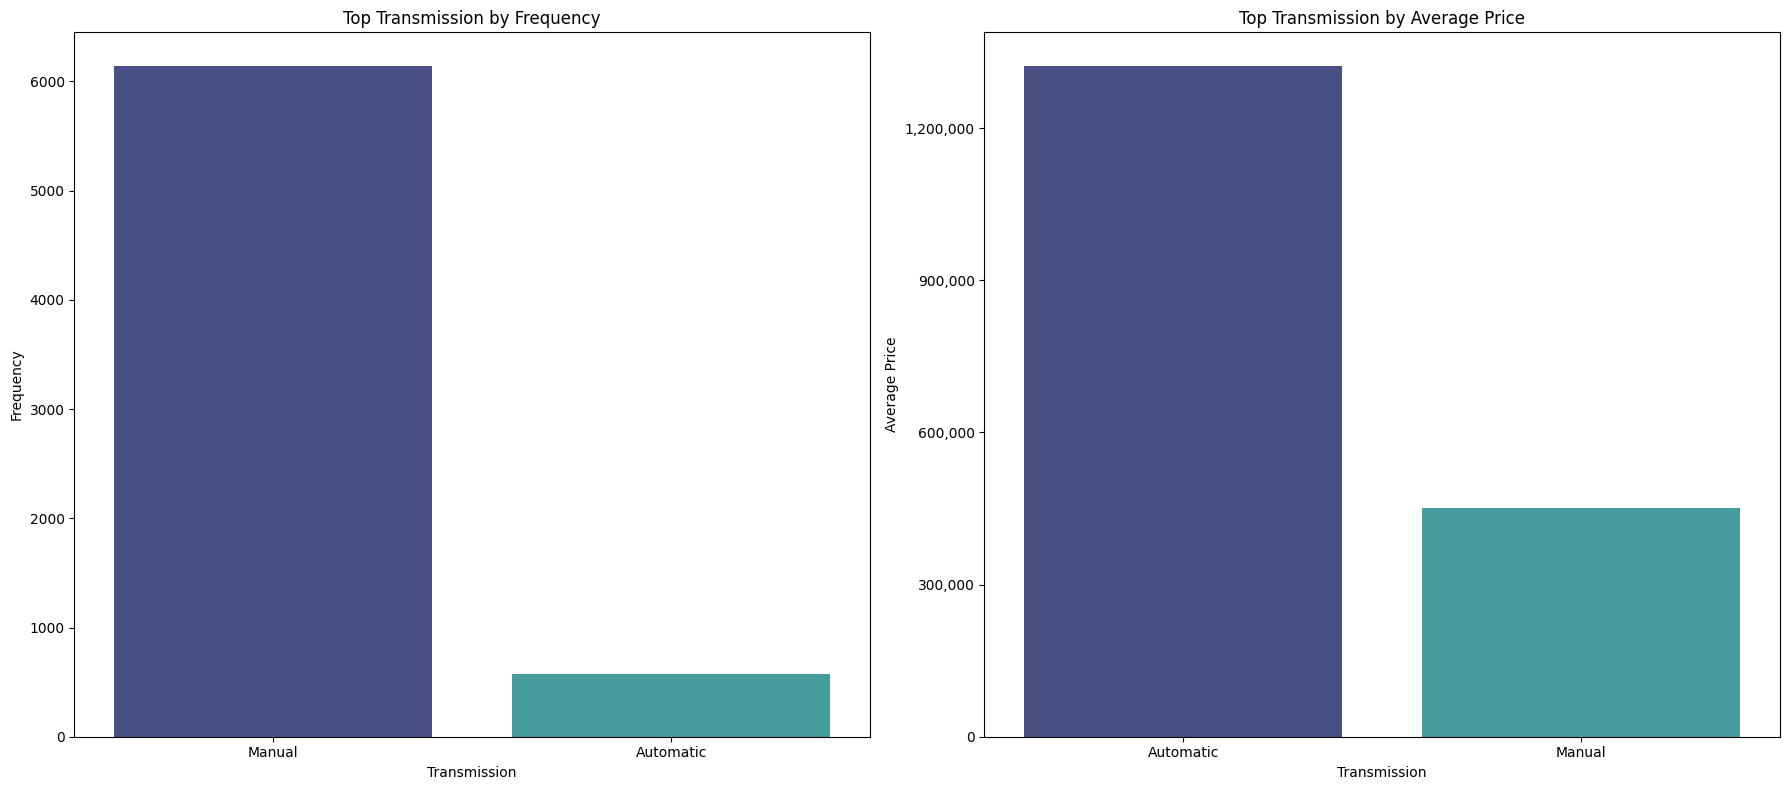

In [ ]:
top_transmission = cars_data['transmission'].value_counts().head(2)

avg_prices_by_transmission = cars_data.groupby('transmission')['selling_price'].mean().sort_values(ascending=False)
top_transmission_prices = avg_prices_by_transmission.head(2)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(ax=axes[0], x=top_transmission.index, y=top_transmission.values, order=top_transmission.index, palette='mako')
axes[0].set_title('Top Transmission by Frequency')
axes[0].set_xlabel('Transmission')
axes[0].set_ylabel('Frequency')

sns.barplot(ax=axes[1], x=top_transmission_prices.index, y=top_transmission_prices.values, order=top_transmission_prices.index, palette='mako')
axes[1].set_title('Top Transmission by Average Price')
axes[1].set_xlabel('Transmission')
axes[1].set_ylabel('Average Price')
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(300000))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


About `transmission`, from the fig above, the number of Automatic is the lowest, but average price are the highest.

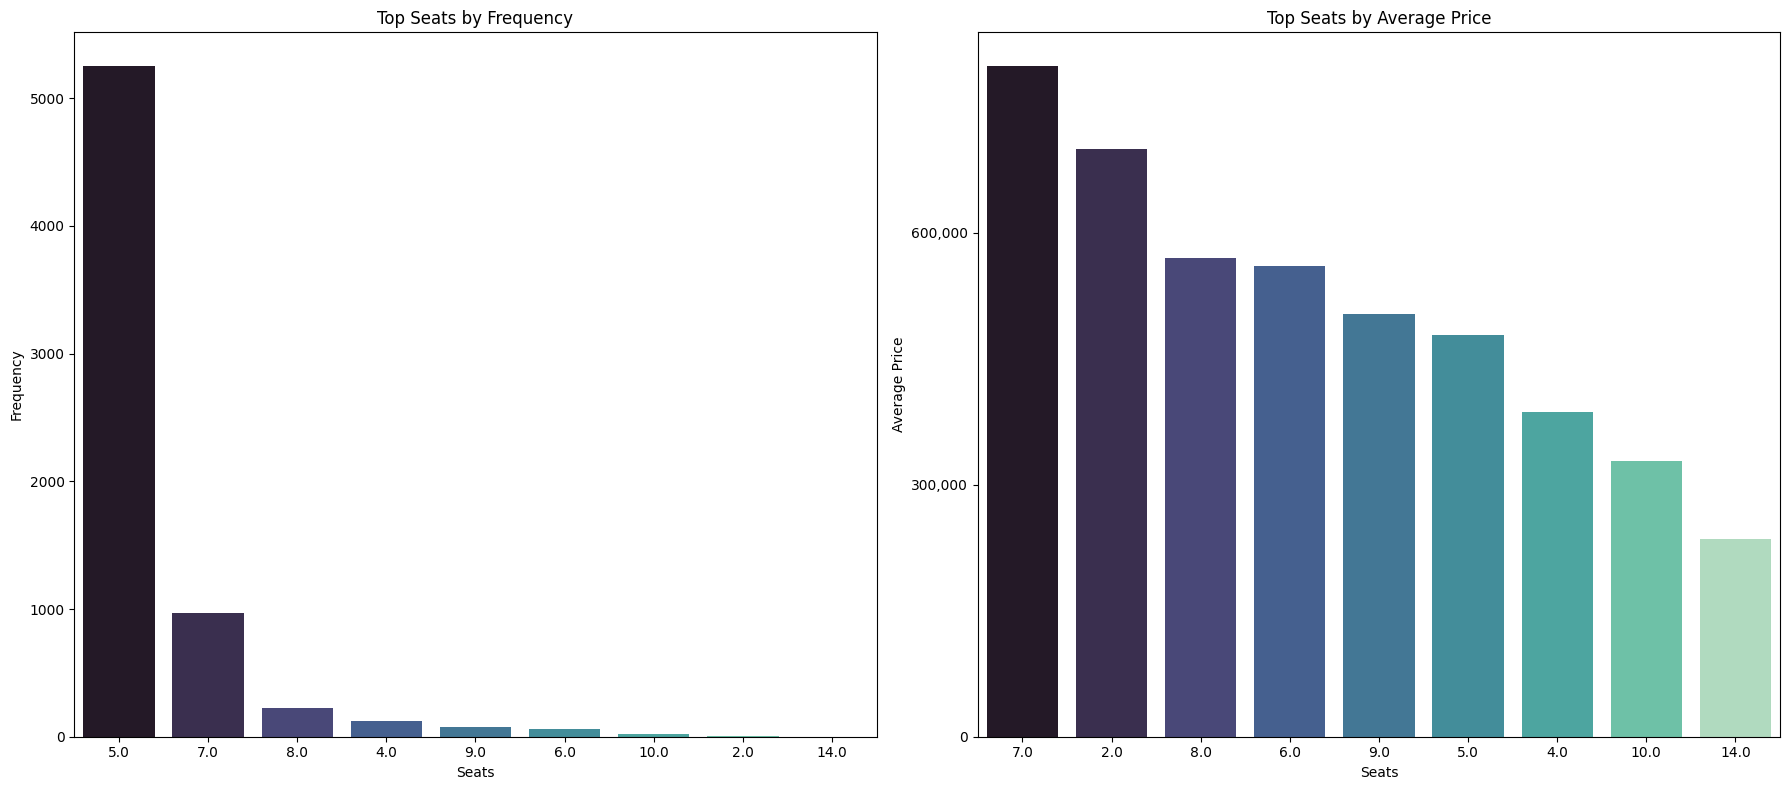

In [ ]:
top_seats = cars_data['seats'].value_counts().head(9)

avg_prices_by_seats= cars_data.groupby('seats')['selling_price'].mean().sort_values(ascending=False)
top_seats_prices = avg_prices_by_seats.head(9)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(ax=axes[0], x=top_seats.index, y=top_seats.values, order=top_seats.index, palette='mako')
axes[0].set_title('Top Seats by Frequency')
axes[0].set_xlabel('Seats')
axes[0].set_ylabel('Frequency')

sns.barplot(ax=axes[1], x=top_seats_prices.index, y=top_seats_prices.values, order=top_seats_prices.index, palette='mako')
axes[1].set_title('Top Seats by Average Price')
axes[1].set_xlabel('Seats')
axes[1].set_ylabel('Average Price')
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(300000))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


Regarding the number of `seats`, according to the picture above, the average price of a 7-seat car here is the highest.

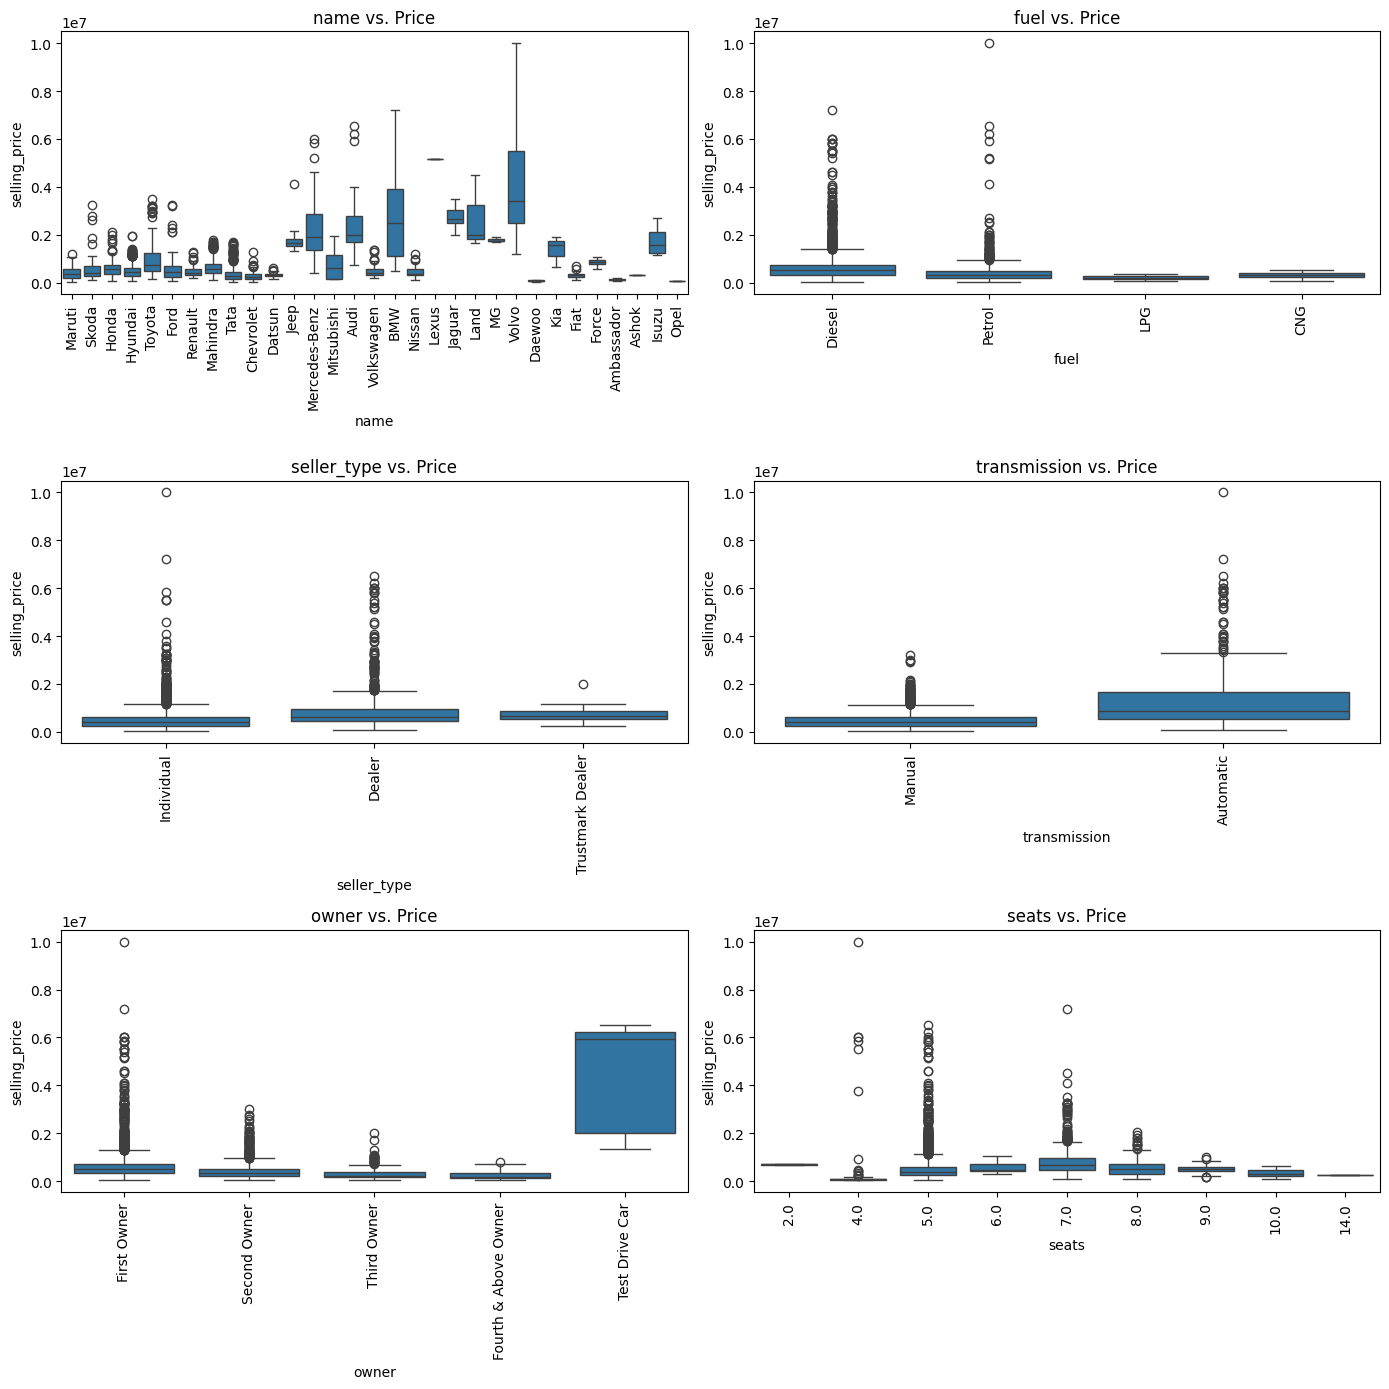

In [ ]:
plt.figure(figsize=(14, 14))
for feature in categorical_columns:
    plt.subplot(3, 2, categorical_columns.index(feature) + 1)
    sns.boxplot(data=cars_data, x=feature, y='selling_price')
    plt.title(f'{feature} vs. Price')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The chart above shows the correlation between factors that affect `selling_price`.

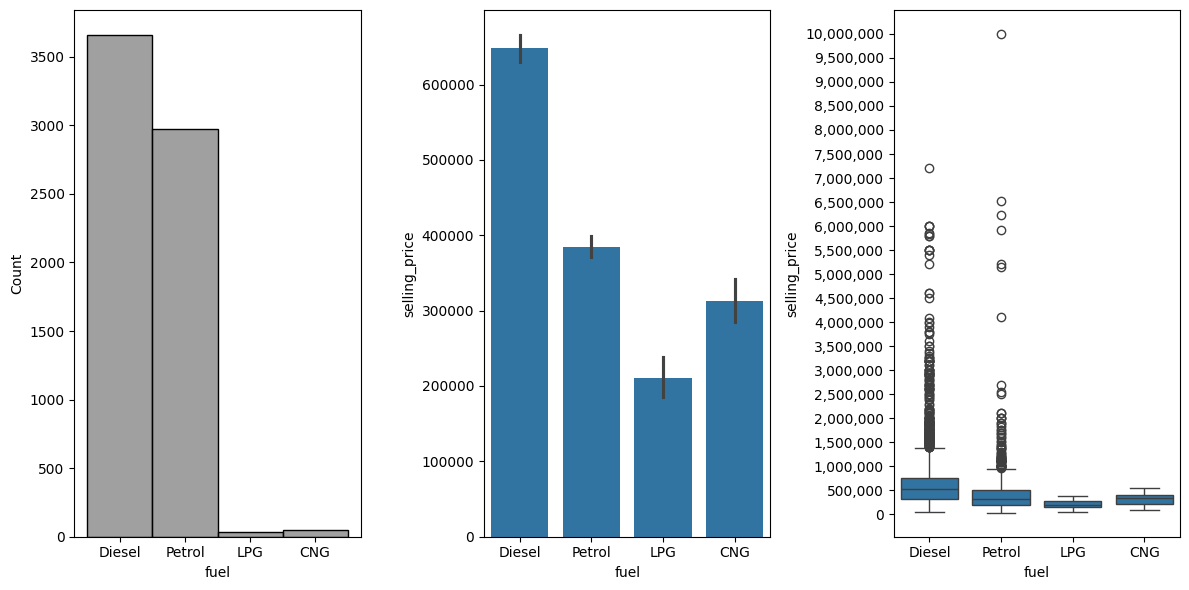

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12,6))
sns.histplot(x='fuel', data=cars_data, ax=axs[0], color='grey')
sns.barplot(x='fuel', y='selling_price', data=cars_data, ax=axs[1])
sns.boxplot(x='fuel', y='selling_price', data=cars_data, ax=axs[2])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()

About `fuel`, from the fig above, the number and selling price of Diesel is the highest.

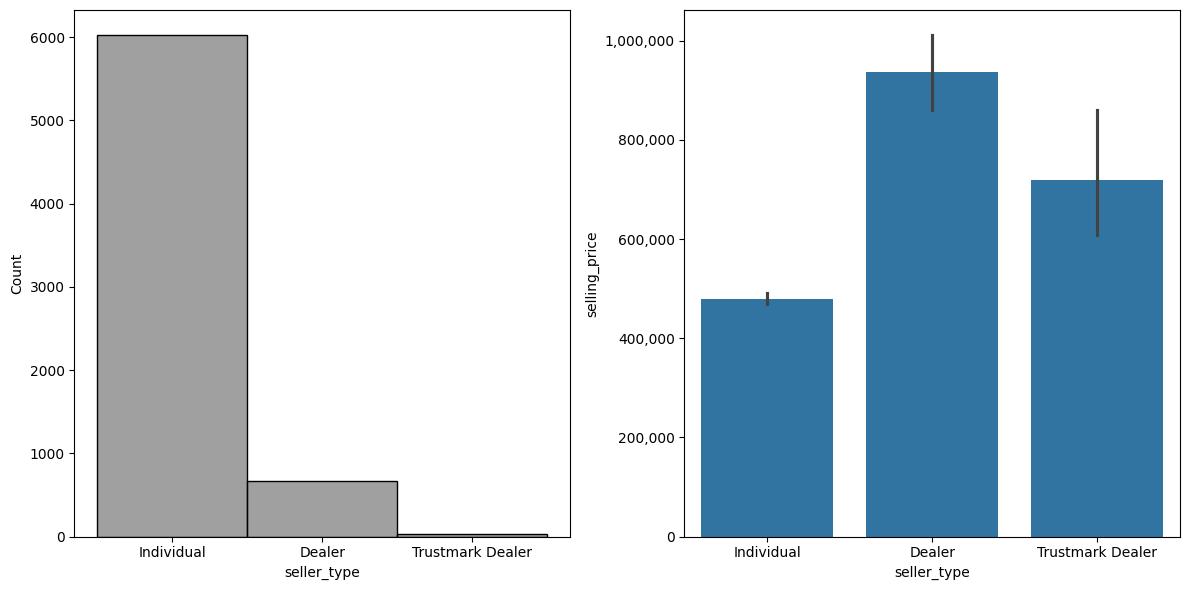

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(x='seller_type', data=cars_data, ax=axs[0], color='grey')
sns.barplot(x='seller_type', y='selling_price', data=cars_data, ax=axs[1])

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()

About `seller_type`, from the fig above, the selling price of Dealer is the highest.

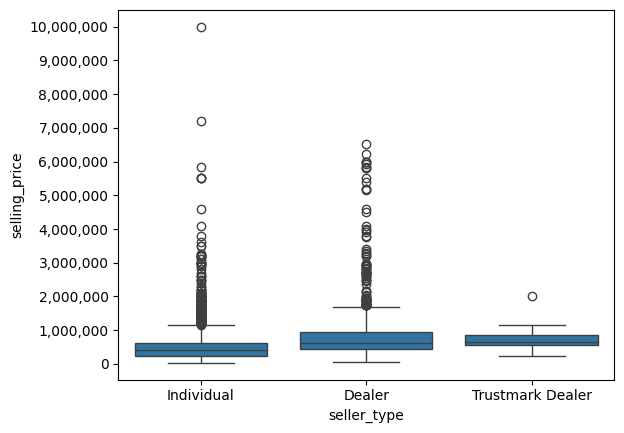

In [ ]:
sns.boxplot(x='seller_type', y='selling_price', data=cars_data)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1000000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

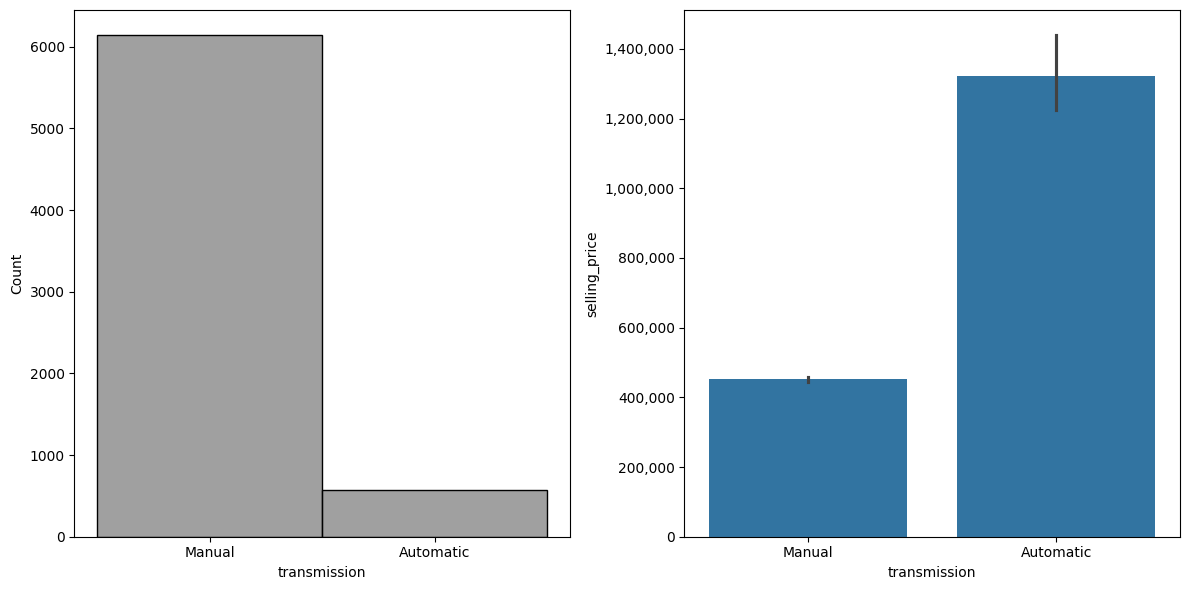

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(x='transmission', data=cars_data, ax=axs[0], color='grey')
sns.barplot(x='transmission', y='selling_price', data=cars_data, ax=axs[1])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()

About `transmission`, we can see the contrast between number of Automatic and their cost.

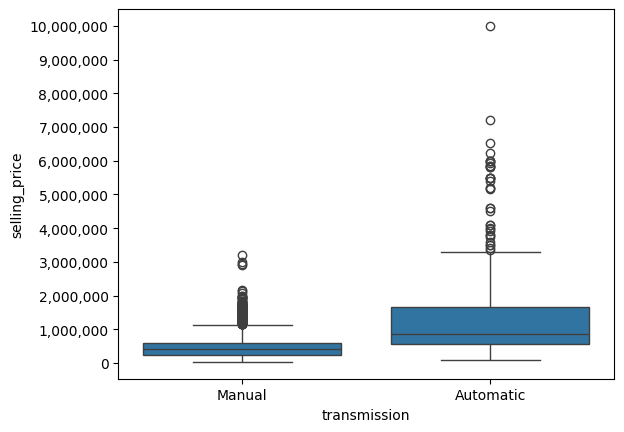

In [ ]:
sns.boxplot(x='transmission', y='selling_price', data=cars_data)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1000000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

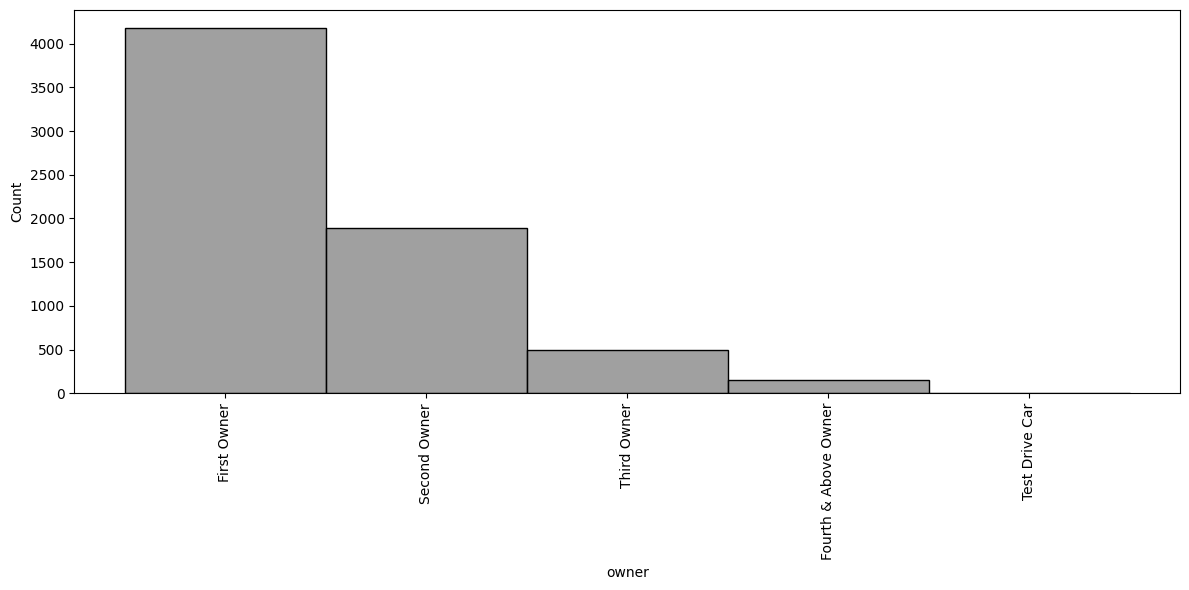

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(12,6))
sns.histplot(x='owner', data=cars_data, color='grey')
plt.xticks(rotation=90)
plt.tight_layout()


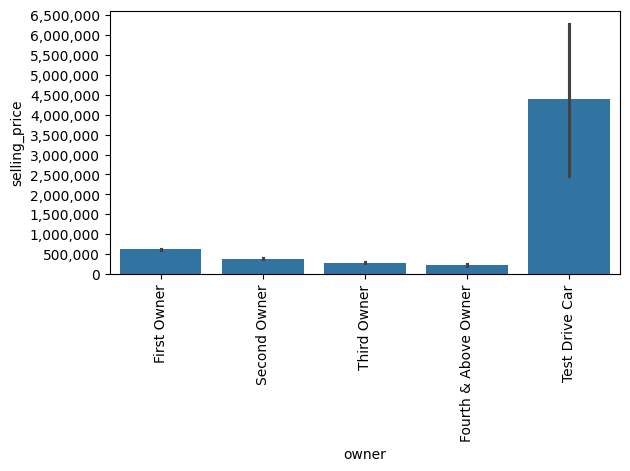

In [ ]:
sns.barplot(x='owner', y='selling_price', data=cars_data)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.tight_layout()

About `owner`, from the fig above, the number of Test Drive Car in the is the lowest, but selling price are the highest.

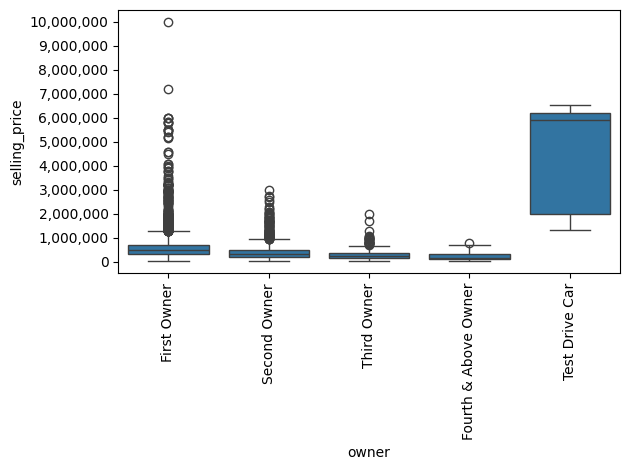

In [ ]:
sns.boxplot(x='owner', y='selling_price', data=cars_data)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1000000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.tight_layout()

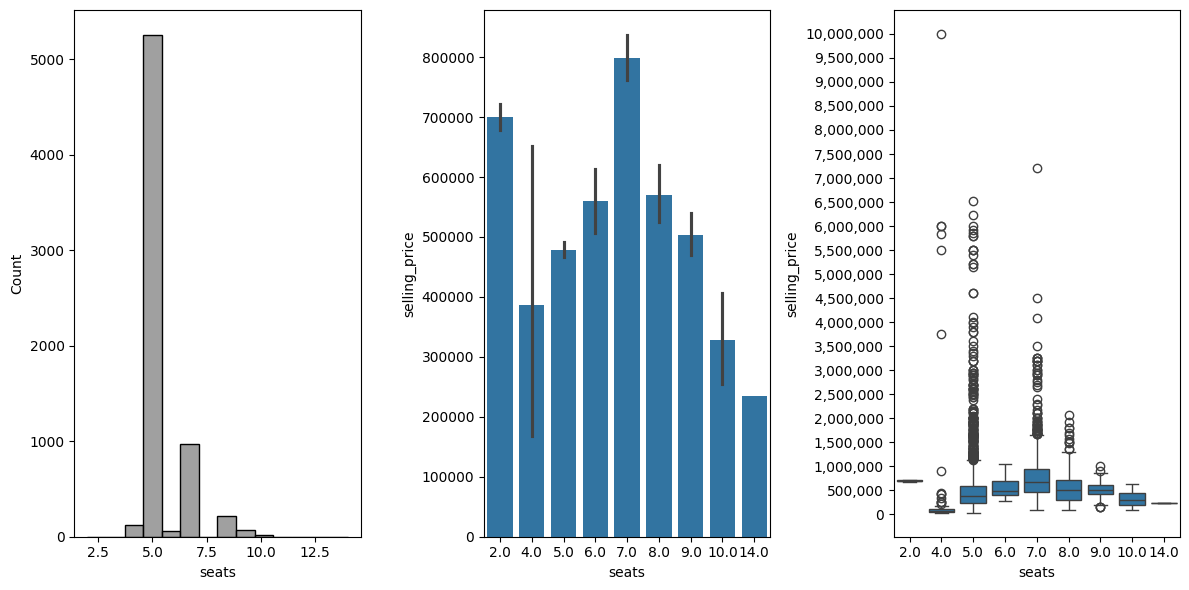

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12,6))
sns.histplot(x='seats', data=cars_data, ax=axs[0], color='grey')
sns.barplot(x='seats', y='selling_price', data=cars_data, ax=axs[1])
sns.boxplot(x='seats', y='selling_price', data=cars_data, ax=axs[2])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()

The `selling_price` does not differ too much between vehicles with different numbers of `seats`.

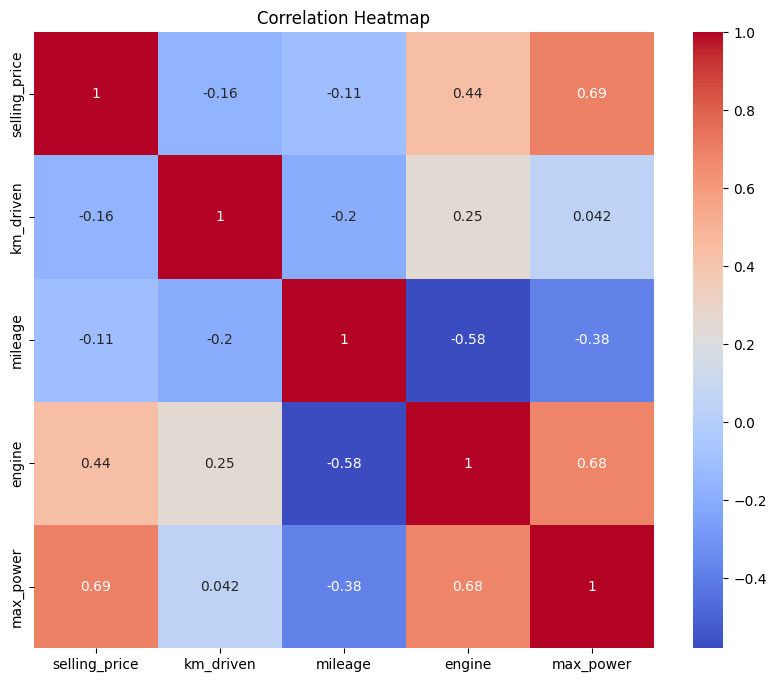

In [ ]:
numerical_features=['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']
correlation_matrix = cars_data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

`max_power` has the biggest influence on `selling_price`.

# **Label Encoding**

In [ ]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [ ]:
cars_data['transmission'].unique()

array([1, 2])

In [ ]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [ ]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [ ]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [ ]:
cars_data.reset_index(inplace=True)

In [ ]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [ ]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [ ]:
cars_data.drop(columns=['index'], inplace=True)

In [ ]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [ ]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

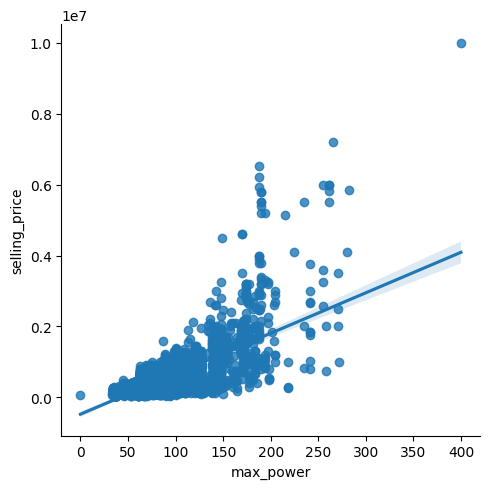

In [ ]:
sns.lmplot(x='max_power', y='selling_price',  data=cars_data)

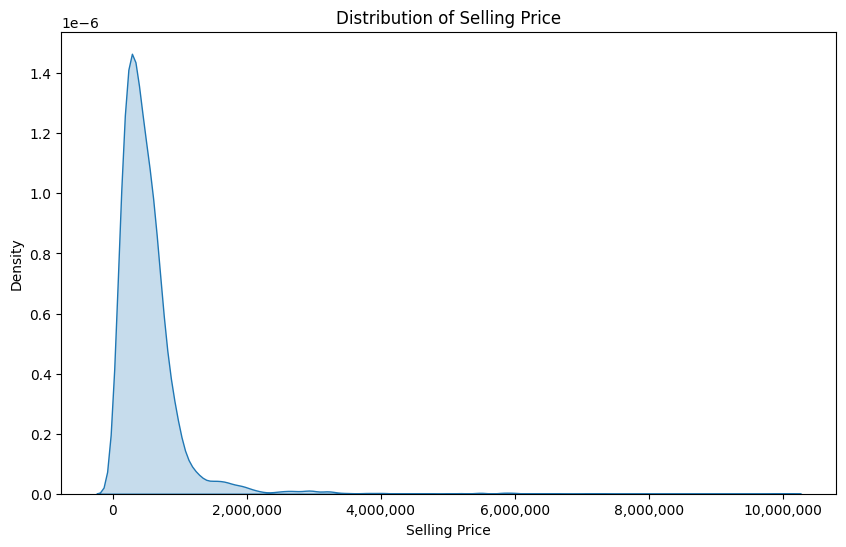

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='selling_price', data=cars_data, shade=True)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()

In [ ]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

# **Traning Models**

Predict with the five regression models:
- `LinearRegression`
- `KNeighborsRegressor`
- `DecisionTreeRegressor`
- `RandomForestRegressor`


Evaluate model based on the two metrics: $MSE$ (Mean Squared Error), $R^2$ score.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

## Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict=np.maximum(0,predict)

In [ ]:
predict

array([1202519.56380807,  145163.21828173,  242429.01805198, ...,
        278201.03430319,  353299.92914578,  445917.26439437])

$MSE$ (Mean Squared Error), $R^2$ score

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, predict)
r2_square = r2_score(y_test,predict)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.6089900808726474
Mean Squared Error: 89873494794.81374


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predict,'Difference':y_test-predict})
pred_df

,Actual Value,Predicted Value,Difference
1051,1100000,1.202520e+06,-102519.563808
6310,110000,1.451632e+05,-35163.218282
3922,340000,2.424290e+05,97570.981948
4132,750000,5.293045e+05,220695.530962
3153,595000,8.027574e+05,-207757.363734
...,...,...,...
2682,500000,3.659000e+05,134100.049937
2108,415000,7.942100e+05,-379209.993402
3210,270000,2.782010e+05,-8201.034303
2354,340000,3.532999e+05,-13299.929146


In [ ]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2668,9,2011,120000,1,1,1,1,19.4,1405.0,70.0,5.0


In [ ]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [ ]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0


In [ ]:
model.predict(input_data_model)

array([973160.22746511])

In [ ]:
import pickle as pk

In [ ]:
pk.dump(model,open('LinearRegression.pkl','wb'))

In [ ]:
import shutil
shutil.copy('LinearRegression.pkl', '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/LinearRegression.pkl')


'/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/LinearRegression.pkl'

## KNeighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model2= KNeighborsRegressor()
model2.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
predict2 = model2.predict(x_test)

$MSE$ (Mean Squared Error), $R^2$ score

In [ ]:
mse2 = mean_squared_error(y_test, predict2)
r2_square2 = r2_score(y_test,predict2)
print(f" R-squared: {r2_square2}")
print(f'Mean Squared Error: {mse2}')

 R-squared: 0.48235883146152225
Mean Squared Error: 118979643713.51869


In [ ]:
pred_df2=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predict2,'Difference':y_test-predict2})
pred_df2

,Actual Value,Predicted Value,Difference
1051,1100000,1600000.0,-500000.0
6310,110000,225000.0,-115000.0
3922,340000,256000.0,84000.0
4132,750000,578000.0,172000.0
3153,595000,550000.0,45000.0
...,...,...,...
2682,500000,1735000.0,-1235000.0
2108,415000,439000.0,-24000.0
3210,270000,236800.0,33200.0
2354,340000,303000.0,37000.0


In [ ]:
pk.dump(model,open('KNR.pkl','wb'))

In [ ]:
import shutil
shutil.copy('KNR.pkl', '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/KNR.pkl')


'/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/KNR.pkl'

## Random Forest

$MSE$ (Mean Squared Error), $R^2$ score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3= RandomForestRegressor()
model3.fit(x_train,y_train)
predict3 = model3.predict(x_test)
mse3 = mean_squared_error(y_test, predict3)
r2_square3 = r2_score(y_test,predict3)
print(f" R-squared: {r2_square3}")
print(f'Mean Squared Error: {mse3}')
pred_df3=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predict3,'Difference':y_test-predict3})
pred_df3

 R-squared: 0.9241328683411102
Mean Squared Error: 17438033995.30102


,Actual Value,Predicted Value,Difference
1051,1100000,1.274710e+06,-174709.930000
6310,110000,1.117650e+05,-1764.990000
3922,340000,3.599299e+05,-19929.940000
4132,750000,7.127900e+05,37210.000000
3153,595000,6.673400e+05,-72339.980000
...,...,...,...
2682,500000,5.815500e+05,-81549.990000
2108,415000,4.213100e+05,-6309.990000
3210,270000,2.572939e+05,12706.080000
2354,340000,3.327394e+05,7260.595238


In [ ]:
pk.dump(model,open('RFR.pkl','wb'))
import shutil
shutil.copy('RFR.pkl', '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/RFR.pkl')

'/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/RFR.pkl'

## Decision Tree

$MSE$ (Mean Squared Error), $R^2$ score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model4= DecisionTreeRegressor()
model4.fit(x_train,y_train)
predict4 = model4.predict(x_test)
mse4 = mean_squared_error(y_test, predict4)
r2_square4 = r2_score(y_test,predict4)
print(f" R-squared: {r2_square4}")
print(f'Mean Squared Error: {mse4}')
pred_df4=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predict4,'Difference':y_test-predict4})
pred_df4

 R-squared: 0.8733225815001535
Mean Squared Error: 29116760867.79349


,Actual Value,Predicted Value,Difference
1051,1100000,2475000.0,-1375000.0
6310,110000,130000.0,-20000.0
3922,340000,380000.0,-40000.0
4132,750000,670000.0,80000.0
3153,595000,650000.0,-55000.0
...,...,...,...
2682,500000,600000.0,-100000.0
2108,415000,430000.0,-15000.0
3210,270000,250000.0,20000.0
2354,340000,330000.0,10000.0


In [ ]:
pk.dump(model,open('DT.pkl','wb'))
import shutil
shutil.copy('DT.pkl', '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/DT.pkl')

'/content/drive/MyDrive/Colab Notebooks/Machine_Learning_21GIT/FinalTerm/DT.pkl'

# **Conclusion**

Based on two metrics: $MSE$ (Mean Squared Error), $R^2$ score, the selected model is `Random Forest` with:

*   $MSE$ = 19798770541.348686
*   $R^2$ = 0.9162816307768232